## 1. Imports

In [12]:
import yaml
import pandas as pd
import numpy as np
import pmaw
import torch
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from statistics import multimode, mode
from collections import Counter
from statsmodels.stats.inter_rater import fleiss_kappa
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel("../../data/wsb_annotations/wsb_annotations_bitio.xlsx", sheet_name="annotations_scale")

In [7]:
df

,id,User 1,User 2,User 3,User 4,User 5,post,Own annotation,Majority Vote
0,h15nzwn,2,2,2,2,2,"\n \nGentlemen, start your boners:\n\nBlackBe...",2,2
1,gyxowrt,2,2,2,2,2,#It has come to my attention that $PLTR Nation...,2,2
2,h0cufvd,2,2,2,2,2,#SNDL and TLRY for smooking weed on the moon 🚬...,2,2
3,h16r93i,2,2,2,2,2,$63k in on WKHS calls,2,2
4,h1adyxq,1,2,1,2,2,$CLF and $MT,1,2
...,...,...,...,...,...,...,...,...,...
178,gx0pu7v,2,2,2,2,2,Woke up on the floor got up and I looked perfe...,2,2
179,gvgbq2j,0,0,0,2,0,"Yeah, I was going to sell my UWMC for a L, but...",0,0
180,h0g8s39,2,2,2,2,2,"Yep, it’s cheap right now and we could see it ...",2,2
181,h12l678,1,1,1,0,0,You didn’t know what a hedge fund was before G...,1,1


In [8]:
# Create raw and normalized confusion matrices
# True = majority vote
# predicted = own annotation
cm_raw = confusion_matrix(df["Majority Vote"], df["Own annotation"], labels=[0,1,2])
#cm_normalized = np.round(cm_raw.astype('float') / cm_raw.sum(axis=1)[:, np.newaxis], decimals=2)

In [9]:
cm_raw

array([[32,  6,  1],
       [ 2, 34,  8],
       [ 0, 14, 86]], dtype=int64)

In [10]:
label_arrangement = ["Negative", "Neutral", "Positive"]

### Plot confusion matrices micro averaged

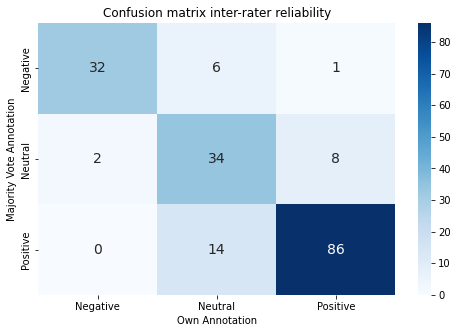

In [14]:
# Create confusion matrices with seaborn

# Raw Confusion matrix
df_cm_raw = pd.DataFrame(cm_raw, columns=label_arrangement, index=label_arrangement)
df_cm_raw.index.name = "Majority Vote Annotation"
df_cm_raw.columns.name = "Own Annotation"
plt.figure(figsize=(8, 5))
plt.title(f"Confusion matrix inter-rater reliability")
plot_cm_raw = sns.heatmap(
    df_cm_raw, cmap="Blues", annot=True, annot_kws={"size": 14}, fmt="g"
)  # font size

# Log raw confusion matrix to wandb
#wandb.log({"Confusion matrix - Raw": wandb.Image(plot_cm_raw)})

In [20]:
p_e

0.39421899728268983

In [16]:
p_e =((39/183 )* (34/183)) + ((44/183) * (54/183)) + ((100/183) * (95/183))
p_0 = 0.830601093

In [17]:
kappa = (p_0 - p_e) / (1 - p_e)
kappa

0.7203627940788189

In [18]:
score = cohen_kappa_score(df["Majority Vote"], df["Own annotation"])

In [19]:
score

0.7203627939074284

In [21]:
86+34+32

152

In [6]:
def majority_vote(annotator_results_list: list):
    return mode(annotator_results_list)


In [7]:
annotators = ["ben", "dliden", "doss", "jmo", "jmo2"]

In [8]:
df["majority vote"] = df[annotators].apply(lambda x: majority_vote(x), axis=1)

In [43]:
test_list = multimode([1,2,2,3,4,4,3])

In [44]:
test_list

[2, 3, 4]

In [39]:
data = Counter(test_list)

In [41]:
data.most_common(1)

[(2, 2)]

In [55]:
df

,id,ben,dliden,doss,jmo,jmo2,post,Own annotation,majority vote
0,h15nzwn,1,1,1,1,1,"\n \nGentlemen, start your boners:\n\nBlackBe...",1.0,1
1,gyxowrt,1,1,1,1,1,#It has come to my attention that $PLTR Nation...,1.0,1
2,h0cufvd,1,1,1,1,1,#SNDL and TLRY for smooking weed on the moon 🚬...,1.0,1
3,h16r93i,1,1,1,1,1,$63k in on WKHS calls,1.0,1
4,h1adyxq,0,1,0,1,1,$CLF and $MT,0.0,1
...,...,...,...,...,...,...,...,...,...
178,gx0pu7v,1,1,1,1,1,Woke up on the floor got up and I looked perfe...,1.0,1
179,gvgbq2j,-1,-1,-1,1,-1,"Yeah, I was going to sell my UWMC for a L, but...",-1.0,-1
180,h0g8s39,1,1,1,1,1,"Yep, it’s cheap right now and we could see it ...",1.0,1
181,h12l678,0,0,0,-1,-1,You didn’t know what a hedge fund was before G...,0.0,0


In [9]:
score = cohen_kappa_score(df["majority vote"], df["Own annotation"])

In [10]:
score

0.7203627939074284

In [11]:
fleiss_kappa(df[annotators].to_numpy())

AssertionError: 

In [12]:
from statsmodels.stats import inter_rater as irr
agg = irr.aggregate_raters(df[["majority vote", "Own annotation"]].to_numpy()) # returns a tuple (data, categories)
agg

(array([[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        [0, 1, 1],
        [0, 2, 0],
        [0, 2, 0],
        [0, 2, 0],
        [0, 0, 2],
        [0, 0, 2],
        [0, 2, 0],
        [0, 0, 2],
        [0, 0, 2],
        [0, 2, 0],
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        [0, 2, 0],
        [0, 1, 1],
        [0, 2, 0],
        [2, 0, 0],
        [1, 1, 0],
        [2, 0, 0],
        [0, 2, 0],
        [2, 0, 0],
        [0, 2, 0],
        [2, 0, 0],
        [0, 0, 2],
        [0, 2, 0],
        [0, 1, 1],
        [0, 2, 0],
        [1, 1, 0],
        [2, 0, 0],
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        [2, 0, 0],
        [0, 2, 0],
        [0, 0, 2],
        [0, 0, 2],
        [1, 0, 1],
        [0, 1, 1],
        [1, 1, 0],
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        [0, 1, 1],
        [0, 

In [13]:
irr.fleiss_kappa(agg[0], method='fleiss')

0.7198449344428257

## Scale evaluation

In [77]:
df["annotator avg"] = df[annotators].mean(axis=1)

In [79]:
df["MAE"] = df[["annotator avg", "Own annotation"]].apply(lambda x: abs(x[0] - x[1]), axis=1)

In [80]:
df

,id,ben,dliden,doss,jmo,jmo2,post,Own annotation,annotator avg,MAE
0,h15nzwn,2,2,2,2,2,"\n \nGentlemen, start your boners:\n\nBlackBe...",2.0,2.0,0.0
1,gyxowrt,2,2,2,2,2,#It has come to my attention that $PLTR Nation...,2.0,2.0,0.0
2,h0cufvd,2,2,2,2,2,#SNDL and TLRY for smooking weed on the moon 🚬...,2.0,2.0,0.0
3,h16r93i,2,2,2,2,2,$63k in on WKHS calls,2.0,2.0,0.0
4,h1adyxq,1,2,1,2,2,$CLF and $MT,1.0,1.6,0.6
...,...,...,...,...,...,...,...,...,...,...
178,gx0pu7v,2,2,2,2,2,Woke up on the floor got up and I looked perfe...,2.0,2.0,0.0
179,gvgbq2j,0,0,0,2,0,"Yeah, I was going to sell my UWMC for a L, but...",0.0,0.4,0.4
180,h0g8s39,2,2,2,2,2,"Yep, it’s cheap right now and we could see it ...",2.0,2.0,0.0
181,h12l678,1,1,1,0,0,You didn’t know what a hedge fund was before G...,1.0,0.6,0.4


In [81]:
MAE = df["MAE"].sum() / len(df["MAE"])

In [82]:
MAE

0.24043715846994532

In [ ]:
"C:\Users\janbu\Desktop\data-1655541559013.csv"

In [3]:
import pandas as pd
df = pd.read_csv("../../../data-1655541559013.csv")

In [2]:
df_ = pd.read_excel("../../data/external/posts_to_annotate.xlsx", sheet_name="data")

In [8]:
positive_word_list = pd.read_excel("../../data/external/posts_to_annotate.xlsx", sheet_name="wsb_expressions", header=None)[0].to_list()

In [10]:
negative_word_list = ["put", "short", "sell", "bearish", "paper hands", "tdm", "crash", "down", "lost"]

In [11]:
negative_word_list

['put',
 'short',
 'sell',
 'bearish',
 'paper hands',
 'tdm',
 'crash',
 'down',
 'lost']

In [12]:
def annotate_automatic(post):
    for word in negative_word_list:
        if word in post.lower():
            return -1
    return None

In [13]:
df["automatic annotation"] = df["post"].apply(lambda x: annotate_automatic(x))

In [14]:
df

,id,post,stock_symbol,automatic annotation
0,14639183,Oh yea saw them NYE Chicago... They opened the...,{AL},NaN
1,14639175,yeah but what matters is the volume of trades ...,{GME},NaN
2,14639164,"Doesn't matter if you buy meme stocks or not, ...",{DOW},NaN
3,14639156,how much will ETSY 200 PUT expiring that week ...,{ETSY},-1.0
4,14639142,"No comissions, good UI. Not that complicated. ...","{GME,HOOD}",NaN
...,...,...,...,...
995,14633426,Their UI is infinitely better than fidelity. I...,{UI},NaN
996,14633412,Thanks any suggestions on how far I should go ...,{PINS},NaN
997,14633390,I should have sold all my PLTR shares and brou...,"{HOOD,PLTR}",NaN
998,14633379,Nice.. what's your next play? Or are you exclu...,{AMD},NaN


In [15]:
df["automatic annotation"].value_counts()

-1.0    226
Name: automatic annotation, dtype: int64

In [16]:
df.to_csv("../../data/external/automatic_annotation_2.csv")